In [3]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def plot_one_image(image: np.ndarray) -> None:
    fig, axs = plt.subplots(1, 1, figsize=(10, 8))
    
    axs.imshow(image)
    axs.axis('off')
    plt.plot()

### Task 3

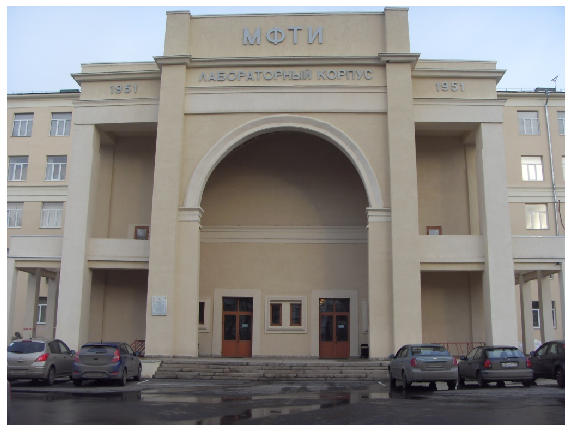

In [5]:
test_image = cv2.imread('task_3/lk.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)

In [6]:
def compute_border(a, b, angle):
    if angle >= 90:
        return int((a**2 + b**2)**0.5*np.sin(np.arctan2(a, b)+np.deg2rad(180-angle))-a)
    else:
        return int((a**2 + b**2)**0.5*np.sin(np.arctan2(a, b)+np.deg2rad(angle))-a)
    
def rotate(image, point, angle):
    h, w, _ = image.shape
    
    top_b = compute_border(h//2, w//2, angle%180)
    left_b = compute_border(w//2, h//2, angle%180)
    
    M1 = cv2.getRotationMatrix2D((w//2, h//2), angle, scale=1.0)
    M1[0,-1] += left_b
    M1[1,-1] += top_b
    
    image = cv2.warpAffine(image.copy(), M1, (w+left_b*2, h+top_b*2))
    return image

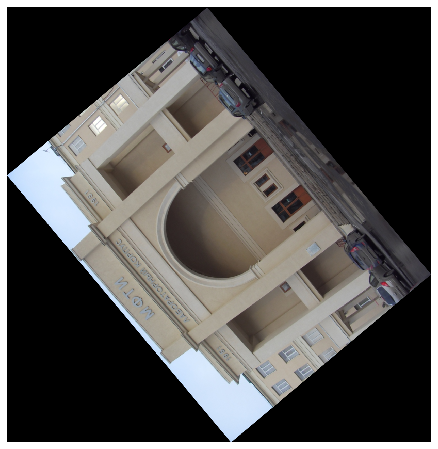

In [7]:
test_image = cv2.imread('task_3/lk.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

test_point = (50, 20)
test_angle = 1210

transformed_image = rotate(test_image, test_point, test_angle)
plot_one_image(transformed_image)

In [37]:
def Affine(x, y, M):
    return M@np.array([x,y,1]).T

def apply_warpAffine(image, point1, point2):
    h, w, _ = image.shape
    M1 = cv2.getAffineTransform(point1, point2)
    
    borders = np.zeros((2, 2), dtype=int)#left top and right bottom corners
    corners = np.array((Affine(0,0,M1), Affine(w-1,0,M1), Affine(0,h-1,M1), Affine(w-1,h-1,M1)))
    
    borders[0,0] = int(np.min(corners[:, 0]))
    borders[0,1] = int(np.min(corners[:, 1]))
    borders[1,0] = int(np.max(corners[:, 0]))
    borders[1,1] = int(np.max(corners[:, 1]))
    
    M1[0,-1] -= borders[0, 0]
    M1[1,-1] -= borders[0, 1]
    
    image = cv2.warpAffine(image.copy(), M1, (borders[1,0]-borders[0,0], borders[1,1]-borders[0,1]))
    return image

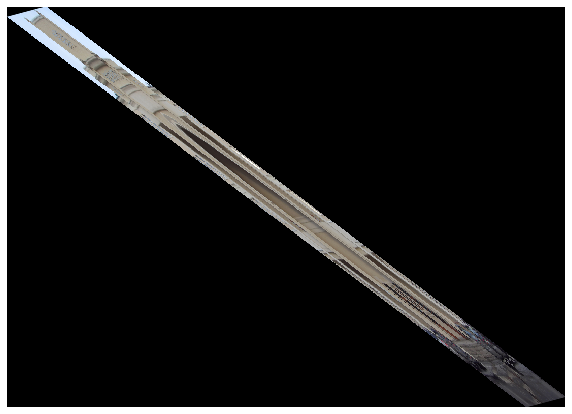

In [40]:
test_point_1 = np.float32([[50, 50], [4000, 50], [50, 200]])
test_point_2 = np.float32([[-100, 100], [200, 20], [100, 250]]) 

transformed_image = apply_warpAffine(test_image, test_point_1, test_point_2)
plot_one_image(transformed_image)